In [30]:
import json

with open("/fsx/loubna/code/data_v2/bigcode-analysis/data_analysis/textbooks_filtering/llama_600_samples.json", "r") as f:
    llama_600 = json.load(f)

with open("/fsx/loubna/code/data_v2/bigcode-analysis/data_analysis/textbooks_filtering/chatgpt_600_samples.json", "r") as f:
    chatgpt_600 = json.load(f)

with open("/fsx/loubna/code/data_v2/bigcode-analysis/data_analysis/textbooks_filtering/gpt4_600_samples.json", "r") as f:
    gpt4_600 = json.load(f)

chatgpt_600[0].keys()

dict_keys(['completion', 'eval_prompt_header', 'generation_config', 'prompt', 'review_model', 'score'])

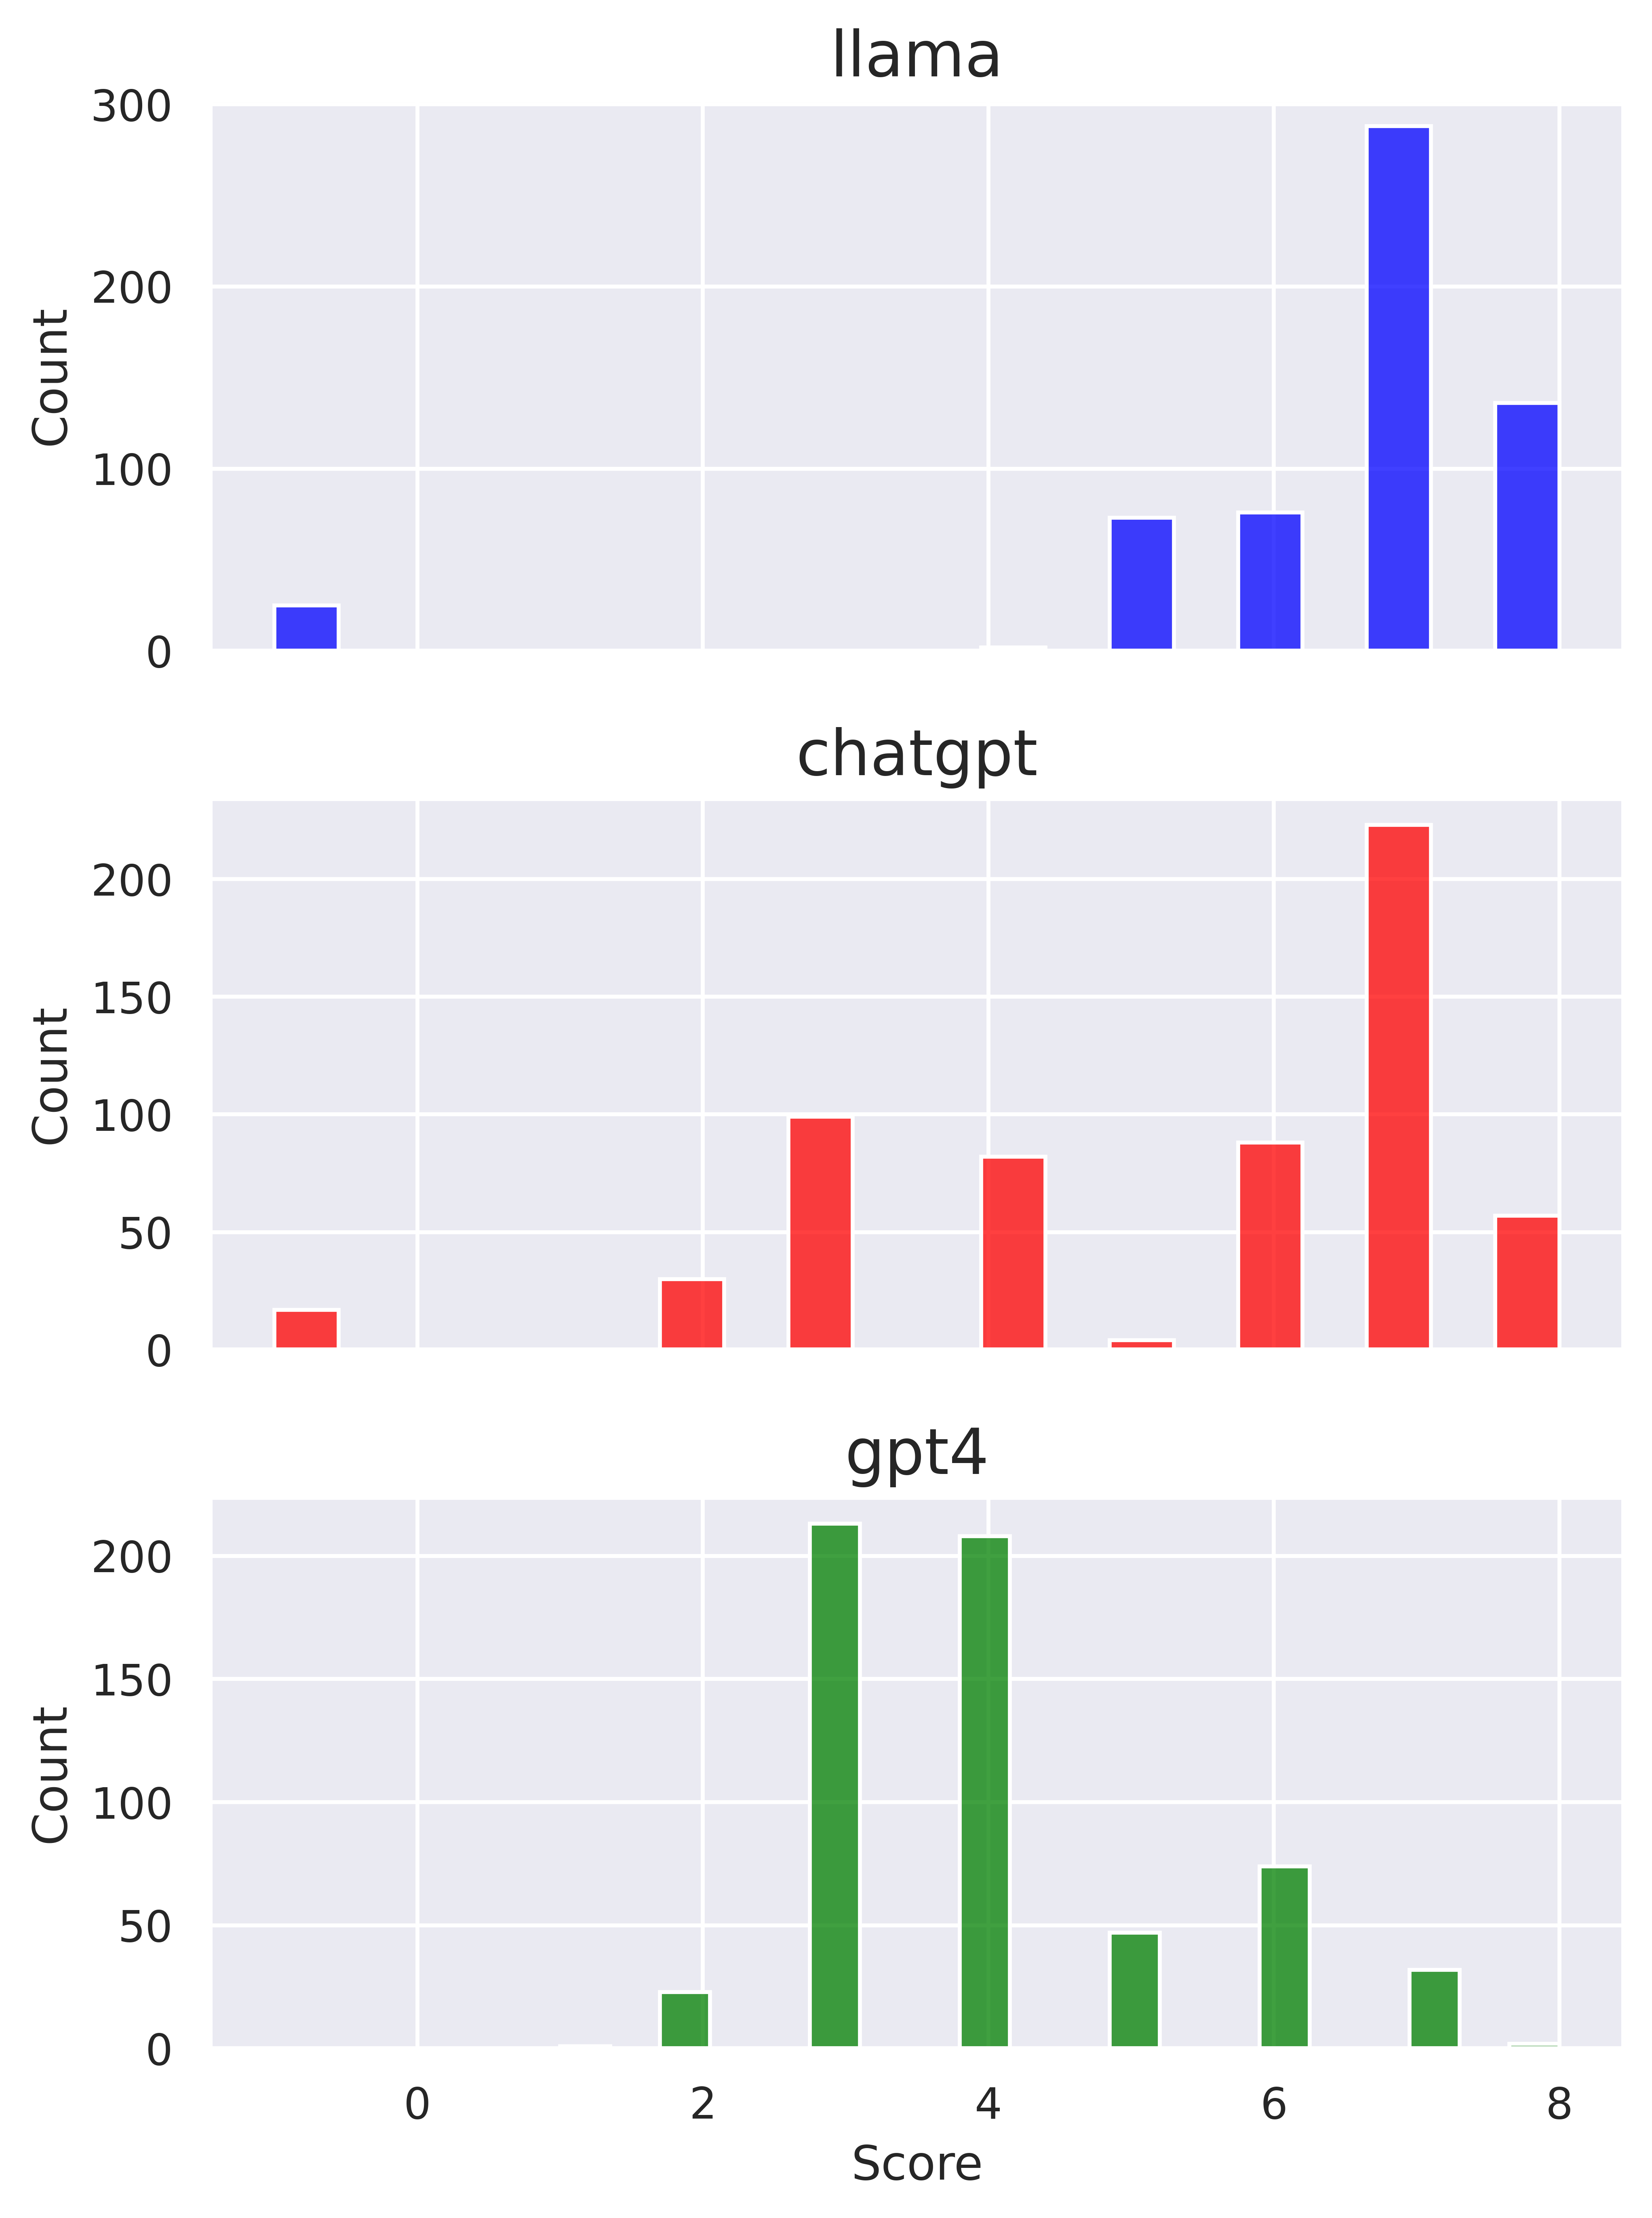

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

# Sample data
scores_llama = [x["score"] for x in llama_600]
scores_chatgpt = [x["score"] for x in chatgpt_600]
scores_gpt4 = [x["score"] for x in gpt4_600]

# Set up the subplots
fig, ax = plt.subplots(3, 1, figsize=(6, 8), dpi=700, sharex=True)

# Plot histograms on individual subplots
sns.histplot(scores_llama, color="blue", label="llama", bins=20, ax=ax[0])
sns.histplot(scores_chatgpt, color="red", label="chatgpt", bins=20, ax=ax[1])
sns.histplot(scores_gpt4, color="green", label="gpt4", bins=20, ax=ax[2])

# Label each subplot
ax[0].set_title("llama", fontsize=16)
ax[1].set_title("chatgpt", fontsize=16)
ax[2].set_title("gpt4", fontsize=16)
# xlabel
ax[2].set_xlabel("Score")
# Adjust layout
plt.tight_layout()

plt.show()


In [54]:
import pandas as pd
from collections import Counter

count_llama = Counter(scores_llama)
count_chatgpt = Counter(scores_chatgpt)
count_gpt4 = Counter(scores_gpt4)
df = pd.DataFrame(
    {
        "llama": count_llama,
        "chatgpt": count_chatgpt,
        "gpt4": count_gpt4,
    }
)
# sort the df by index
df = df.sort_index()
df = df.fillna(0)
df = df.astype(int)
df

,llama,chatgpt,gpt4
-1.0,25,17,0
1.0,0,0,1
2.0,0,30,23
3.0,0,99,213
4.0,2,82,208
5.0,73,4,47
6.0,76,88,74
7.0,288,223,32
8.0,136,57,2


In [68]:
# find examples that have 8 score with chatgpt and have 7 or 8 with gpt4
examples_8_chatgpt = [x for x in chatgpt_600 if x["score"] == 8]
examples_8_llama = [x for x in llama_600 if x["score"] == 8]
examples_7_8_gpt4 = [x for x in gpt4_600 if x["score"] in [7, 8]]
examples_7_8_chatgpt = [x for x in chatgpt_600 if x["score"] in [7, 8]]


prompts_8_chatgpt = [x["prompt"] for x in examples_8_chatgpt]
prompts_7_8_gpt4 = [x["prompt"] for x in examples_7_8_gpt4]
prompts_7_8_chatgpt = [x["prompt"] for x in examples_7_8_chatgpt]

overlap_chagpt_hpt4 = []
for ex in examples_8_chatgpt:
    if ex["prompt"] in prompts_7_8_gpt4:
        overlap_chagpt_hpt4.append(ex)

print(f"Overlap between chatgpt and gpt4: {len(overlap_chagpt_hpt4)}")
overlap_llama_gpt4 = []
for ex in examples_8_llama:
    if ex["prompt"] in prompts_7_8_gpt4:
        overlap_llama_gpt4.append(ex)

print(f"Overlap between llama and gpt4: {len(overlap_llama_gpt4)}")
overlap_llama_chatgpt = []
for ex in examples_8_llama:
    if ex["prompt"] in prompts_7_8_chatgpt:
        overlap_llama_chatgpt.append(ex)

print(f"Overlap between llama and chatgpt: {len(overlap_llama_chatgpt)}")

Overlap between chatgpt and gpt4: 6
Overlap between llama and gpt4: 4
Overlap between llama and chatgpt: 71


In [72]:
# Extract prompts with specific scores
prompts_8_chatgpt = set(x["prompt"] for x in chatgpt_600 if x["score"] == 8)
prompts_8_llama = set(x["prompt"] for x in llama_600 if x["score"] == 8)
prompts_7_8_gpt4 = set(x["prompt"] for x in gpt4_600 if x["score"] in [7, 8])
prompts_7_8_chatgpt = set(x["prompt"] for x in chatgpt_600 if x["score"] in [7, 8])
prompts_7_8_llama = set(x["prompt"] for x in llama_600 if x["score"] in [7, 8])

# Compute overlaps
overlap_chatgpt_gpt4 = prompts_8_chatgpt.intersection(prompts_7_8_gpt4)
overlap_llama_gpt4 = prompts_8_llama.intersection(prompts_7_8_gpt4)
overlap_llama_chatgpt = prompts_8_llama.intersection(prompts_7_8_chatgpt)
overlap_chatgpt_llama = prompts_8_chatgpt.intersection(prompts_7_8_llama)

print(f"Chatgpt 8 score prompts (out of {len(prompts_8_chatgpt)}) that were given a 7/8 score by GPT4: {len(overlap_chatgpt_gpt4)}")
print(f"ChatGPT 8 score prompts (out of {len(prompts_8_chatgpt)}) that were given a 7/8 score by LLaMA: {len(overlap_chatgpt_llama)}")
print(f"LLaMA 8 score prompts (out of {len(prompts_8_llama)}) that were given a 7/8 score by GPT4: {len(overlap_llama_gpt4)}")
print(f"LLaMA 8 score prompts (out of {len(prompts_8_llama)}) that were given a 7/8 score by ChatGPT: {len(overlap_llama_chatgpt)}")

Chatgpt 8 score prompts (out of 57) that were given a 7/8 score by GPT4: 6
ChatGPT 8 score prompts (out of 57) that were given a 7/8 score by LLaMA: 45
LLaMA 8 score prompts (out of 136) that were given a 7/8 score by GPT4: 4
LLaMA 8 score prompts (out of 136) that were given a 7/8 score by ChatGPT: 71


In [74]:
# show examples with a score of 8 and their completions
for review in gpt4_600:
    if review["score"] in [7, 8]:
        # print in a nice way the prompt and the completion
        print("*"*50 + " Prompt: " + "*"*50)
        print(review["prompt"])
        print("-"*50 + " Explanation of the score: " + "-"*50)
        print(review["completion"])
        print("\n\n")

************************************************** Prompt: **************************************************
Please act as an impartial judge and evaluate the educational value of the code file displayed below for someone just starting to learn coding concepts. Your evaluation should prioritize clarity and simplicity to ensure the code is easily digestible for a beginner. Be as objective as possible. You must first rate the code file on a scale of 1 to 10 by strictly following this format: "[[rating]]", for example: "Rating: [[5]]", then provide a short explanation of the rating.

Code file:

"""项目配置"""

# 图灵机器人，99元一月付费版，尽情享用！
tuling_api_key = '88f17f853d974387af64955bed9466f4'

# 自动回复
is_friend_auto_reply = False  # 好友自动回复
is_group_reply = False  # 此项表示群中是否回复
is_group_at_reply = False  # 上一项开启后此项才生效
is_forward_revoke_msg = True  # 开启防撤回模式
is_forward_group_at_msg = False  # 转发群@我的消息

# 机器人主人
bot_master_name = ''  # 使用备注名更安全，只允许一个，可远程控制机器人，如果不设置(空)则将文件助手设置为管理员，但不具备远程控制功能

# 监听某些好友群聊，如老

In [90]:
from datasets import Dataset, DatasetDict
import pandas as pd

llama_ds = Dataset.from_pandas(pd.DataFrame(data=llama_600))
chatgpt_ds = Dataset.from_pandas(pd.DataFrame(data=chatgpt_600))
gpt4_ds = Dataset.from_pandas(pd.DataFrame(data=gpt4_600))

ds = DatasetDict({
    'llama_70b_chat': llama_ds,
    'chatgpt': chatgpt_ds,
    'gpt4': gpt4_ds
})
ds.push_to_hub("textbooks-filtering-600-samples")